# TME3: introduction à Numpy

> Consignes: le fichier TME3_Sujet.ipynb est à déposer sur le site Moodle de l'UE https://moodle-sciences.upmc.fr/moodle-2018/course/view.php?id=4650. Si vous êtes en binôme, renommez-le en TME3_nom1_nom2.ipynb.

## Exercice 1: 
Implémenter les exemples vu en TD. Imprimer les tableaux résultats pour vérification.

In [30]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math
import sys

#Exercice 1

l=[x for x in range (100)]
tab=np.array(l)
t=tab.reshape(10,10)
print(t)
print ("Le type est :", type(tab))

#2
#Le type le plus économique est int 8

#3

tab2=t.astype(np.float32)
print(tab2)
tab3=t.astype(np.float64)
print(tab3)

#4

print(t.ndim, t.shape, t.size)

#5

tab4=np.zeros(100)
print(tab4)

#6

s=(20,30)
tab5=np.zeros(s)
print(tab5)

#7
#tab7=np.array(255)
#t3=tab7.reshape(20,30,3)

#Exercice 2
#1

def moyenne(t):
    l, p =t.shape
    cpt=0
    for i in range (l):
        for j in range (p):
            cpt+=t[i,j]
    return cpt/t.size

print(moyenne(t))

#2

vect = np.arange(-(math.pi), math.pi, (2*math.pi)/99, float)
print(vect)

#3

vect2=np.sin(vect)
print(vect2)


[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]
Le type est : <class 'numpy.ndarray'>
[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
 [20. 21. 22. 23. 24. 25. 26. 27. 28. 29.]
 [30. 31. 32. 33. 34. 35. 36. 37. 38. 39.]
 [40. 41. 42. 43. 44. 45. 46. 47. 48. 49.]
 [50. 51. 52. 53. 54. 55. 56. 57. 58. 59.]
 [60. 61. 62. 63. 64. 65. 66. 67. 68. 69.]
 [70. 71. 72. 73. 74. 75. 76. 77. 78. 79.]
 [80. 81. 82. 83. 84. 85. 86. 87. 88. 89.]
 [90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]]
[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
 [20. 21. 22. 23. 24. 25. 26. 27. 28. 29.]
 [30. 31. 32. 33. 34. 35. 36. 37. 38. 39.]
 [40. 41. 42. 43. 44. 45. 46

## Exercice 2: Numpy et les images

### 2.1 Normalisation
Normaliser l'image <tt>img/seiche.png</tt>. Indication: utiliser les méthodes <tt>min()</tt> et <tt>max()</tt> de la classe <tt>ndarray</tt>. Afficher l'image PIL <tt>seiche.png</tt> puis le tableau numpy normalisé. Ps: si l'image numpy apparait colorée, utiliser la fonction gray() qui fixe la palette de couleurs d'<tt>imshow()</tt> en niveaux de gris.

[[1.69655172 1.67586207 1.66206897 ... 1.35172414 1.32413793 1.29655172]
 [1.71724138 1.68275862 1.65517241 ... 1.33103448 1.33103448 1.31034483]
 [1.73103448 1.69655172 1.67586207 ... 1.33793103 1.34482759 1.31724138]
 ...
 [1.26206897 1.29655172 1.32413793 ... 1.36551724 1.3862069  1.4       ]
 [1.31724138 1.33103448 1.32413793 ... 1.33793103 1.36551724 1.44137931]
 [1.35172414 1.35172414 1.34482759 ... 1.35172414 1.35172414 1.35862069]]


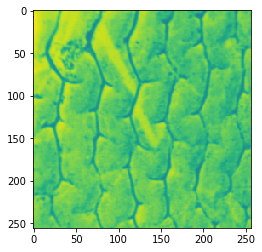

In [56]:
from PIL import Image
from pylab import *

def normalisation(file):
    img=Image.open(file)
    tab=np.array(img)
    L=((tab-tab.min())*255)/(tab.max()-tab.min())
    return L

print(normalisation("img/seiche.png"))

imshow(normalisation("img/seiche.png"))
    
    

### 2.2 Visualisation PIL et Numpy
Lire l'image <tt>img/CT-scan.png</tt> (une coupe d'une acquisition d'un scanner X d'un corps humain) avec PIL et sa classe <tt>Image</tt>. Imprimer les extremas de l'image et l'image PIL. Transformer-là en tableau Numpy. A nouveau afficher ce tableau sous forme d'image. Que constatez-vous ?

Text(0.5,1,'Image modifiée')

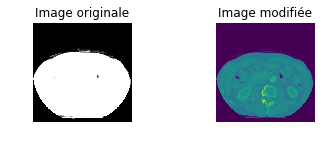

In [69]:
img=Image.open("img/CT-scan.png")

plt.subplot(2,2,1)
plt.axis('off')
imshow(img)
plt.title('Image originale')

img.getextrema()
tab=np.array(img)

plt.subplot(2,2,2)
plt.axis('off')
imshow(tab)
plt.title('Image modifiée')


### 2.3 Seuillage
Prendre le tableau numpy de la question précédente. Appliquer un seuillage haut au seuil 255. 
Remarque: cette opération se fait une instruction Python. Afficher le résultat sous forme d'image et comparer avec l'image PIL affichée à la question précédente. Qu'en déduisez vous du comportement de imshow() sur les images PIL ?

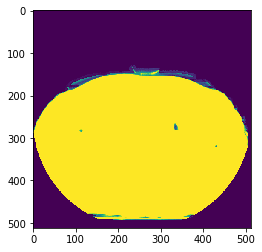

In [70]:
def seuillage (tab, val):
    l=tab >val
    tab[l]=val
    return tab

seuil=seuillage(tab, 255)
imshow(tab)


### 2.4 Seuillage - suite
Sur la même image, appliquer un seuillage à 1000 et commenter la visualisation de l'image seuillée. Essayer d'autres valeurs de seuils pour différentier certains organes.


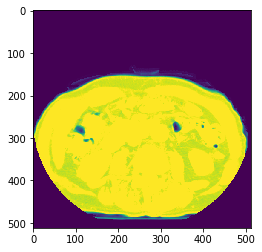

In [71]:
tab=np.array(img)
seuil2=seuillage(tab, 1000)
imshow(seuil2)

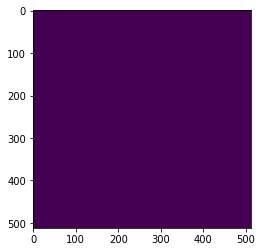

In [72]:
tab=np.array(img)
seuil3=seuillage(tab, 0)
imshow(seuil3)

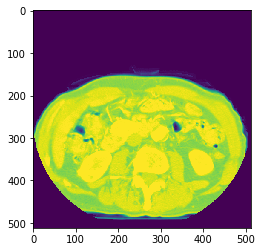

In [73]:
tab=np.array(img)
seuil4=seuillage(tab, 1122)
imshow(seuil4)

### 2.4 Damier
Comment fabriquer un image qui représente un damier (alternance de 6 cases blanches et 6 cases noires en ligne et en colonne), chaque case étant de taille 20 par 20. On pourra utiliser les fonctions <tt>hstack()</tt>, <tt>vstack()</tt> et <tt>tile()</tt>.

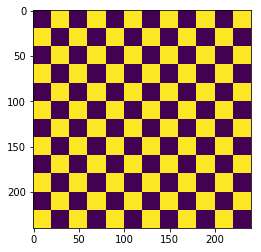

In [74]:
def damier():
    tab=np.zeros((20,20))
    tab1=np.zeros((20,20))
    tab1+=255
    v=np.hstack((tab, tab1))
    v1=np.tile(v, 6)
    u=np.hstack((tab1, tab))
    v2=np.tile(u, 6)
    l=np.tile((v1, v2), (6,1,1))
    return np.vstack((l))
imshow(damier())

## Exercice 3: Manipulation et parcours de tableaux
### 3.1 Permutation de colonnes
Écrire un code Python qui créé un tableau <tt>A</tt> initialisé à des valeurs quelconque, ou bien une image lue sur le disque, construit un tableau <tt>B</tt> de même taille qui contient en première colonne la dernière colonne de <tt>A</tt>, et pour ses colonnes restantes, les premières colonnes de <tt>A</tt>. 


A = 
 [[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]
B = 
 [[ 9  1  2  3  4  5  6  7  8  0]
 [19 11 12 13 14 15 16 17 18 10]
 [29 21 22 23 24 25 26 27 28 20]
 [39 31 32 33 34 35 36 37 38 30]
 [49 41 42 43 44 45 46 47 48 40]
 [59 51 52 53 54 55 56 57 58 50]
 [69 61 62 63 64 65 66 67 68 60]
 [79 71 72 73 74 75 76 77 78 70]
 [89 81 82 83 84 85 86 87 88 80]
 [99 91 92 93 94 95 96 97 98 90]]


Text(0.5,1,'B=')

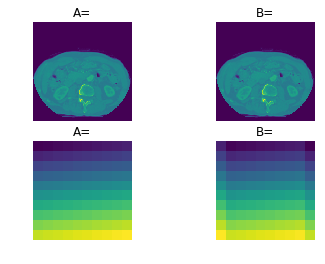

In [54]:
def permutation (A):
    B=A.copy()
    B[:,0]=A[:,-1]
    B[:,-1]=A[:,0]
    return B

#test avec image

img=Image.open("img/CT-scan.png")
img= np.array(img)

subplot (2 ,2 ,1)
axis("off")
imshow(img)
title("A=")

subplot (2 ,2 ,2)
axis("off")
imshow(permutation(img))
title("B=")

#test avec tableau numpy

m=[x for x in range (100)]
tabb=np.array(m)
t=tabb.reshape(10,10)
print("A = \n",t)
print("B = \n",permutation(t))
subplot (2 ,2 ,3)
axis("off")
imshow(t)
title("A=")

subplot (2 ,2 ,4)
axis("off")
imshow(permutation(t))
title("B=")


### 3.2 Duplication de lignes et colonnes
Écrire un code Python qui prend le même tableau <tt>A</tt>, créé un tableau <tt>A2</tt> ayant 2 lignes et deux colonnes de plus que <tt>A</tt> et telque :
 - <tt>A2</tt> privé de ses premières et dernières lignes et colonnes doit valoir <tt>A</tt>. 
 - Les bords de <tt>A2</tt> doivent correspondre aux bords de <tt>A</tt>. Les valeurs aux coins de A2 ne devraient pas vous poser de problème !


In [37]:
def duplication(A):
    l, m =A.shape
    A2 = np.zeros((l+2,m+2))
    #Intérieur
    A2[1:-1,1:-1] = A

    #Bord
    A2[0,1:-1] = A[0,:]
    A2[-1,1:-1] = A[-1,:]
    A2[1:-1,0] = A[:,0]
    A2[1:-1,-1] = A[:,-1]
    
    return A2

m=[x for x in range (100)]
tabb= np.array(m)
t=tabb.reshape(10,10)
print("A = \n",t)
print("A2 = \n",duplication(t))

    

A = 
 [[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]
A2 = 
 [[ 0.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9.  0.]
 [ 0.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9.  9.]
 [10. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 19.]
 [20. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 29.]
 [30. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 39.]
 [40. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 49.]
 [50. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 59.]
 [60. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 69.]
 [70. 70. 71. 72. 73. 74. 75. 76. 77. 78. 79. 79.]
 [80. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89. 89.]
 [90. 90. 91. 92. 93. 94. 95. 96. 97. 98. 99. 99.]
 [ 0. 90. 91. 92. 93. 94. 95. 96. 97. 98. 99.  0.]]


### 3.3 Temps de calcul
Reprendre l'exercice 2 du TME2 en utilisant Numpy: calculer les extremas d'un tableau numpy (de grande taille, par exemple l'image <tt>../TME2/img/genies-math.jpg</tt> convertie en niveaux de gris), en parcourant par indice les valeurs du tableau. Puis utiliser les méthodes <tt>min()</tt> et <tt>max()</tt>. Chronométrer les temps grâce aux fonctions <tt>tic()</tt> et <tt>tac()</tt>. Discuter ces temps.

In [48]:
from time import process_time
mytime = 0
def tic():
    global mytime
    mytime = process_time()
def tac():
    global mytime
    print (process_time()-mytime)
    mytime = process_time()

###

def extrema (t):
    max =t[0][0]
    min =t[0][0]
    for j in range(len(t)):
        for i in t[j]:
            if i<min:
                min=i
            if i>max:
                max=i
    return min, max

img=Image.open("img/genies-math.jpg")
img1=img.convert('L')
img2= np.array(img1)

print("Temps que met notre fonction extrema :")
tic()
print(extrema(img2))
tac()

print("Temps que met la fonction getextrema() :")
tic()
print(img1.getextrema())
tac()


Temps que met notre fonction extrema :
(0, 255)
0.9856825589999989
Temps que met la fonction getextrema() :
(0, 255)
0.010189599000000271
